In [3]:
from brian2 import *
import brian2.numpy_ as np
prefs.codegen.target = 'numpy'

start_scope()
#Implementing the independent CaK current.

duration = 100*ms
#Parameters
C = 1*ufarad
Cai = 50*nmole
gCaKmax = 0.0001*siemens
temp = 34
VK = -90*mV
d1 = 0.84
d2 = 1
kalp = 480*nmole
kbet = 130*pmole
abar = 0.28/ms
bbar = 0.48/ms
R = 8.314*joule/mole
far = 96485*amp*second/mole
V0 = -40*mV

@check_units(k=mole, d=1,V=volt, result=mole)
def exp1(k, d, V):
    return k*exp(-2*d*far*V*(273.15 + temp)/R)

eqs = Equations('''
                    dV/dt = (ICaK + I)/C : volt
                    ICaK = gCaK*(V - VK) : amp            
                    gCaK = gCaKmax*oCaK : siemens
                    doCaK/dt = (infoCaK - oCaK)/tauCaK : 1
                    infoCaK = alpCaK*tauCaK : 1
                    tauCaK = 1/(alpCaK + betCaK) : second  
                    alpCaK = Cai*abar/(Cai + exp1(kalp, d1, V)) : Hz (constant over dt)
                    betCaK = bbar/(1 + Cai/exp1(kbet, d2, V)) : Hz (constant over dt)
                    I : amp
                    ''')

group = NeuronGroup(1, eqs, threshold='V > -40*mV', refractory='V > -40*mV', method='rk2')
M = StateMonitor(group, variables=True, record=True)



WARNING    /usr/lib/python3.6/site-packages/brian2/units/fundamentalunits.py:206: RuntimeWarning: overflow encountered in exp
  return func(np.array(x, copy=False), *args, **kwds)
 [py.warnings]
WARNING    /usr/lib/python3.6/site-packages/brian2/units/fundamentalunits.py:1371: RuntimeWarning: divide by zero encountered in true_divide
  result = operation(self_arr, other_arr)
 [py.warnings]
WARNING    <string>:14: RuntimeWarning: divide by zero encountered in true_divide
 [py.warnings]
WARNING    <string>:14: RuntimeWarning: divide by zero encountered in true_divide
 [py.warnings]
WARNING    <string>:14: RuntimeWarning: divide by zero encountered in true_divide
 [py.warnings]
WARNING    <string>:14: RuntimeWarning: divide by zero encountered in true_divide
 [py.warnings]
WARNING    <string>:14: RuntimeWarning: divide by zero encountered in true_divide
 [py.warnings]
WARNING    <string>:14: RuntimeWarning: divide by zero encountered in true_divide
 [py.warnings]
WARNING    <string>:14: R

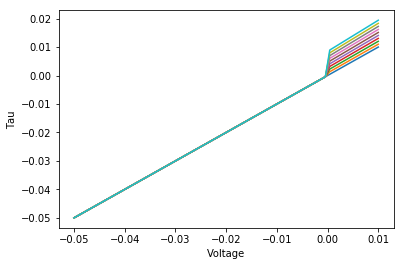

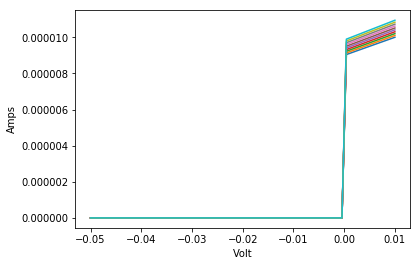

In [4]:
store()
# Plot tau and the channel current for different voltages
voltages = np.linspace(-50, 10, 70) * mV
vs = []
Is = []
for volt in voltages:
    # Restore the original state of the network
    restore()
    alp0 = Cai*abar/(Cai + exp1(kalp, d1, volt)) 
    bet0 = bbar/(1 + Cai/exp1(kbet, d2, volt))
    tau = 1/(alp0 + bet0)
    group.oCaK = alp0*tau
    group.V = volt
    # Run it with the new value of tau
    run(1 * ms)
    vs.append(M.V[0])
    Is.append(M.ICaK[0])

figure(1)
plot(voltages, vs)
xlabel('Voltage')
ylabel('Tau');

figure(2)
plot(voltages, Is)
xlabel('Volt')
ylabel('Amps');
show()